Домашнее задание 2: библиотека Numpy и линейная алгебра

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import ndimage  # спецификатор для работы с изображениями
from scipy import misc
import scipy.stats as sps

from PIL import Image

from random import randint


from sklearn.datasets import load_sample_image #импорт загрузчика изображения

from copy import copy

%matplotlib inline

Что такое NumPy? - это питоновская библиотека для работы с массивами 
Зачем используется и почему работает быстрее? - сам по себе питон не адаптирован к простой работе с массивами, а она адаптирована 
Что такое линейная алгебра? - это раздел математики, в котором оперируют матрицами
Как она связана с машинным обучением и глубоким обучением? - в машинном обучении мы будем оперировать матрицами

Задание 1

В первой задаче вам предлагается перемножить две квадратные матрицы двумя способами -- без использования пакета numpy и с ним.

In [ ]:
# Для генерации матриц используем фукнцию random -- она используется для генерации случайных объектов 
# функция sample создает случайную выборку. В качестве аргумента ей передается кортеж (i,j), здесь i -- число строк,
# j -- число столбцов.
a = np.random.sample((10,10))
b = np.random.sample((10,10)) 
# выведите размерность (ранг) каждой матрицы с помощью функции ndim.
print(a.ndim)
print(b.ndim)
# Используйте функцию shape, что она вывела?
print(a.shape) # shape даёт число элементов по каждому из направлений матрицы
print(b.shape)
# ========
# тут можно писать код

def sc_matrix(matrix_first, matrix_second):
    ''' функция скалярного перемножения 2 матриц без np '''
    b = len(matrix_first[0]) != len(matrix_second)
    if b:
        return print('оу оу оу, такие матрицы перемножать скалярно не выйдет, число столбцов первой матрицы не равно числу строк второй')
    else:
        result_matrix = [[0 for el in range(0, len(matrix_second[0]))] for le in range(0, len(matrix_first))]
        for i in range(0, len(matrix_first)):
            for j in range(0, len(matrix_second[0])):
                for r in range(0, len(matrix_first[0])):
                    result_matrix[i][j] += matrix_first[i][r]*matrix_second[r][j]
        return np.array(result_matrix)

def sc_matrix_np(matrix_first, matrix_second):
    ''' функция скалярного перемножения 2 матриц с np '''
    try:
        return np.dot(matrix_first, matrix_second)
    except ValueError as ve:
        return print(f'ошибка: {ve}')

# ========
print(f'{a}\n')
print(b)

In [ ]:
%%timeit
# засечем время работы функции без NumPy
sc_matrix(a,b)

In [ ]:
%%timeit
# засечем время работы функции с NumPy
sc_matrix_np(a,b)

Разница $10^3$ нумпай впереди


Задание 2

Напишите функцию, которая по данной последовательности $\{A_i\}_{i=1}^n$ строит последовательность $S_n$, где $S_k = \frac{A_1 + ... + A_k}{k}$. Аналогично -- с помощью библиотеки NumPy и без нее. Сравните скорость, объясните результат.

In [9]:
n = int(input('Enter n, число элементов последовательности : '))
#a_list = np.random.sample((n,1))
#print(a_list)
# без библиотеки нумпай
a_list_sec = [randint(0, 10) for i in range(0, n)] # sps.uniform.rvs(size=10 ** 7) #
A = a_list_sec
#print(a_list_sec)
#print(a_list_sec.ndim)
#print(a_list_sec.shape)
#print(a_list_sec.size)
def wo_np_list(a_list_sec):
    ''' функция считает последовательность без юзания нумпая '''
    # print(f'исходный вектор : {a_list_sec}')
    a_sum = 0
    s_list = [0 for i in range(0, len(a_list_sec))]
    for i, j in enumerate(a_list_sec):
        a_sum += j
        s_list[i] = round(a_sum / (i+1), 2)
    return s_list # f'конечная последовательность : {s_list}'

#s_list = wo_np_list(a_list_sec)
#print(s_list)

# с библиотекой нумпай
def w_np_list(a_list):
    ''' функция считает последовательность с юзанием нумпая '''
    a_list_sec = np.array(a_list)
    # print(f'исходный вектор : {a_list_sec}')
    a_list_test = np.array([round(a_list_sec[:i].sum()/(i),2) for i in range(1, n+1)])
    return a_list_test # f'конечная последовательность : {a_list_test}'

#s_list = w_np_list(a_list_sec)
#print(s_list)

Enter n, число элементов последовательности : 3


In [22]:
%timeit S1 = wo_np_list(A)
%timeit S2 = w_np_list(A)
S1 = wo_np_list(A)
S2 = w_np_list(A)
#проверим корректность:
np.abs(S1 - S2).sum()

3.53 µs ± 250 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
31.5 µs ± 3.39 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


0.0

Задание 3

Пусть задан некоторый массив $X$. Надо построить новый массив, где все элементы с нечетными индексами требуется заменить на число $a$ (если оно не указано, то на 1). Все четные элементы исходного массива нужно возвести в куб и записать в обратном порядке относительно позиций этих элементов. Массив $X$ при этом должен остаться без изменений. В конце требуется слить массив $X$ с преобразованным $X$ и вывести в обратном порядке.

In [101]:
x_list = [randint(1, 100) for i in range(0, randint(0, 10))] 
print(x_list)
def wo_np_list(x_list, a = 1):
    ''' без нумпая делаем всё что нужно '''
    xx_list_rev = x_list[::-1]
    xx_list = [a if i%2 == 0 else xx_list_rev[len(x_list) - i]**3 for i in range(0, len(x_list))]
    return (x_list + xx_list)[::-1]
#print(wo_np_list(x_list))

def w_np_list(x_list, a = 1):
    ''' с нумпаем делаем всё что нужно '''
    x_list = np.array(x_list)
    x_result = np.where(np.flatnonzero(x_list) % 2 == 0, a, np.flipud(x_list)**3) #np.flatnonzero(x_list) - с нулями не дружит, но ничего более подходящего я найти не смог :()
    return np.concatenate([x_list, x_result])
print(list(w_np_list(x_list)))


[77, 4, 65, 39, 23, 87, 33, 38, 99]
[77, 4, 65, 39, 23, 87, 33, 38, 99, 1, 54872, 1, 658503, 1, 59319, 1, 64, 1]


In [85]:
# черновик для быстрых тестов того, что внутри функции
x_list = np.array([randint(0, 1) for i in range(0, randint(0, 10))])
print(x_list)
x_flat = np.flatnonzero(x_list)
print(x_flat)
for i in x_flat:
    print(i)

[1 0 1 1]
[0 2 3]
0
2
3


Задание 4

Вам подаются на вход два вектора a и b в трехмерном пространстве.Заполните их случайными числами. Реализуйте их скалярное произведение с помощью NumPy и без. Засеките время работы, как это показано в заданиях выше.

In [55]:
a_matrix = [randint(0, 1000) for i in range(0, 3)]# [1,2,3] #np.random.randint(0, 10, (3)) 
b_matrix = [randint(0, 1000) for i in range(0, 3)]# [1,2,3] #np.random.randint(0, 10, (3)).transpose()
print(a_matrix)
print(b_matrix)

def sc_matrix_np(matrix_first, matrix_second):
    ''' функция скалярного перемножения 2 матриц с np'''
    matrix_first = np.array(matrix_first)
    matrix_second = np.array(matrix_second).transpose()
    try:
        return np.dot(matrix_first, matrix_second) # перемножаем норм на транспонированную
    except ValueError as ve:
        return print(f'ошибка: {ve}')
print(sc_matrix_np(a_matrix, b_matrix))


def sc_matrix(matrix_first, matrix_second):
    ''' функция скалярного перемножения 2 матриц без np '''
    b = len(matrix_first) != len(matrix_second)
    if b:
        return print('оу оу оу, такие матрицы перемножать скалярно не выйдет, число столбцов первой матрицы не равно числу строк второй')
    else:
        result_matrix = [0 for el in range(0, len(matrix_second))]
        for i in range(0, len(matrix_first)):
            result_matrix[i] += matrix_first[i]*matrix_second[i]
        return sum(result_matrix)
# a_matrix = [1,2,3] #[randint(0, 10) for i in range(0, 3)]
# b_matrix = [1,2,3] #[randint(0, 10) for i in range(0, 3)]
print(a_matrix)
print(b_matrix)
print(sc_matrix(a_matrix, b_matrix))

[297, 741, 616]
[400, 708, 187]
758620
[297, 741, 616]
[400, 708, 187]
758620


In [57]:
%timeit product_1 = sc_matrix_np(a_matrix, b_matrix)
%timeit product_2 = sc_matrix(a_matrix, b_matrix)
# проверим корректность:
np.abs(product_1 - product_2).sum()

8.89 µs ± 398 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
3.37 µs ± 101 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


0

Задание 5*

Нужно написать матричное произведение БЕЗ циклов и БЕЗ символа @, БЕЗ np.dot 
и вообще БЕЗ какой-либо вспомогательной функции из numpy, то есть пользуясь только 
индексированием, взятем суммы по нужным осям и поэлементным произведенем (да, это возможно). 
Рекомендуем гуглить по запросу "NumPy broadcasting"

In [158]:
#M = np.random.randint(0, 10, (2, 3))  #np.arange(3).reshape((3, 1)) #np.arange(3) #np.ones((3))
#print(f'M :\n {M}\n')
#a = np.random.randint(0, 10, (3, 2))  #np.arange(3) #np.arange(3)[:, np.newaxis] #np.array([0, 1, 2])
#print(f'a :\n {a}\n')
#b = np.array([5, 5, 5])
#print(f'M*a :\n {M+a}\n')



a_matrix = np.random.randint(0, 10, (2, 3)) 
b_matrix = np.random.randint(0, 10, (3, 2)) 
print(f'a_matrix :\n {a_matrix}\n')
print(f'b_matrix :\n {b_matrix}\n')
print(f' вывод через dot :\n{np.dot(a_matrix,b_matrix)}\n')
c_matrix = a_matrix * b_matrix
print(f'\n')
print(c_matrix)
print(f'\n')
    

a_matrix :
 [[1 1 0]
 [4 6 6]]

b_matrix :
 [[6 3]
 [3 9]
 [8 0]]

 вывод через dot :
[[ 9 12]
 [90 66]]



ValueError: operands could not be broadcast together with shapes (2,3) (3,2) 

In [159]:
X = np.arange(12).reshape((3, 4))
print(X)
print(f'\n')
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
print(X[row, col])
print(f'\n')
print(X[row[:, np.newaxis], col])
print(f'\n')
mask = np.array([1, 0, 1, 0], dtype=bool)
print(X[row[:, np.newaxis], mask])
print(f'\n')



[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


[ 2  5 11]


[[ 2  1  3]
 [ 6  5  7]
 [10  9 11]]


[[ 0  2]
 [ 4  6]
 [ 8 10]]




Бонусная часть, Задание 1

тип : <class 'numpy.ndarray'>
размеры : 3, (768, 1024, 3), 2359296
внутри лежит трёхмерный массив

первые 10 записей в матрице картинки :
[[[121 112 131]
  [138 129 148]
  [153 144 165]
  ...
  [119 126  74]
  [131 136  82]
  [139 144  90]]

 [[ 89  82 100]
  [110 103 121]
  [130 122 143]
  ...
  [118 125  71]
  [134 141  87]
  [146 153  99]]

 [[ 73  66  84]
  [ 94  87 105]
  [115 108 126]
  ...
  [117 126  71]
  [133 142  87]
  [144 153  98]]]

максимальное значение глубины цвета: 255
минимальное значение глубины цвета:np.min(pic)
среднее значение глубины цвета: np.mean(pic)

значения глубины цветов лежит между 0 и 255


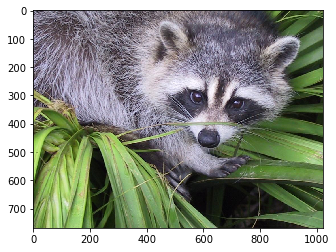

In [187]:
# Image = 2-D численный массив (или 3-D: CT, MRI, 2D + time; 4-D, …)
# В текущем задании, image == Numpy array (np.array)
pic = misc.face()  # встроенная в библиотеку функция, которая загружает картинку с енотом

# Выведите тип и размеры для переменной pic. Что лежит внутри?
print(f'тип : {type(pic)}\nразмеры : {pic.ndim}, {pic.shape}, {pic.size}\nвнутри лежит трёхмерный массив\n')
#plt.imshow(pic)

#plt.imshow(pic)

#Убедитесь, что внутри массива pic действительно лежат числа. 
#Выведите первые 10 записей. 
print(f'первые 10 записей в матрице картинки :\n{pic[0:3:1]}\n')
#Массив состоит из троек чисел, которые характеризуют глубину цвета для каждого пикселя. 
#Из пикселей складывается картинка.

#Выведите значение максимального элемента в матрице. 
print(f'максимальное значение глубины цвета: {np.max(pic)}')
#Выведите значение минимального. 
print(f'минимальное значение глубины цвета:np.min(pic)')
#Выведите среднее по всем элементам матрице. 
print(f'среднее значение глубины цвета: np.mean(pic)')
#В каких пределах лежат значения глубины цветов?
print(f'\nзначения глубины цветов лежит между {np.min(pic)} и {np.max(pic)}')


Задание 2

Теперь загрузим черно-белое изображение енота, чтобы наш массив был не 3-х мерным тензором, а двумерным массивом. Тензоры обрабатываются точно также, но для простоты пока что давайте работать с двумерными массивами, т.е. матрицами.

тип : <class 'numpy.ndarray'>
размеры : 2, (768, 1024), 786432
внутри лежит трёхмерный массив



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


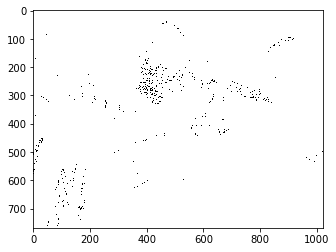

In [10]:
pic = misc.face(gray=True)
#plt.imshow(pic)
print(f'тип : {type(pic)}\nразмеры : {pic.ndim}, {pic.shape}, {pic.size}\nвнутри лежит трёхмерный массив\n')
h, w = pic.shape
#Используя библиотеку numpy, отразите изображение по горизонтали. Выведите картинку.
#Подсказка: не забывайте, что изображения -- это просто двумерные массивы
pic_second = np.fliplr(pic)
#plt.imshow(pic_second)
# Теперь давайте повысим контрастность -- для этого к каждому пикселю прибавим 50 единиц
pic_second += 50
#plt.imshow(pic_second)
new_pic = np.zeros((h,w,3)) #создадим пустую матрицу, куда будем записывать значения
for i in range(h):
    for j in range(w):
        new_pic[i][j] = (int(pic[i][j]/3),int(pic[i][j]/3),int(pic[i][j]/3))
plt.imshow(new_pic)

Задание 3

Теперь давайте уменьшим качество картинки в 16 раз, путем уменьшения качества изображения, т.е. теперь 16 пикселей по близости надо заполнить одним значением.

(427, 640, 3)
3
174
201
231
1
1
[174 201 230]
0


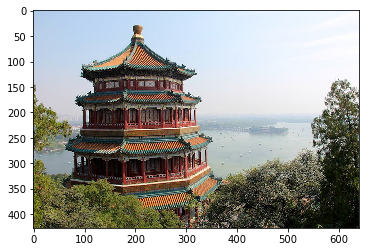

In [146]:
china = load_sample_image('china.jpg')
plt.imshow(china)
print(china.shape)
h, w, c = china.shape
print(china.ndim)

#def w_np_list(x_list, a = 1):
#    ''' с нумпаем делаем всё что нужно '''
#    x_list = np.array(x_list)
#    x_result = np.where(x_list % 4 == 0, a, np.flipud(x_list))
#    return x_result

compressed_pic = copy(china)
#compressed_pic = np.array_split(compressed_pic, 4)
plt.imshow(compressed_pic)
print(compressed_pic[0][0][0])
print(compressed_pic[0][0][1])
print(compressed_pic[0][0][2])

#print(f'len(compressed_pic[0] : {len(compressed_pic[0])}')
#my_list = [i*4 for i in range(1, 1+int(len(compressed_pic[0])/4))]
###print(my_list)
#my_list_1 = np.array(np.split(compressed_pic[0], my_list))
#my_list = [i*4 for i in range(1, 1+int(len(compressed_pic[1])/4))]
#my_list_2 = np.array(np.split(compressed_pic[1], my_list))
#print(my_list_1[0])
#print(my_list_1.ndim)

vert_list = np.array(np.vsplit(compressed_pic, [4]))
print(vert_list.ndim)
gorz_list = np.hsplit(vert_list, [4])
print(np.array(gorz_list).ndim)
print(vert_list[1][0][0])
#for i in range(0, len(vert_list[1][0][0])):
#    vert_list[i] = vert_list[i][i][i][0]

    
    
    

#print(compressed_pic[0:4,0:4])

#for i in range(0, len(compressed_pic[0])):
#    compressed_pic[i]
    

#

#plt.imshow(compressed_pic)

def calculate_mismatch(a,b):
    mismatch=0
    mismatch = sum(sum(sum(a - b)))
    print(mismatch)
calculate_mismatch(china, compressed_pic)

china.shape : (427, 640, 3)
china.ndim : 3
тип : <class 'numpy.ndarray'>
размеры : 3, (427, 640, 3), 819840
compressed_pic[0] : [[174 201 231]
 [174 201 231]
 [174 201 231]
 ...
 [250 251 255]
 [250 251 255]
 [250 251 255]] - 
compressed_pic[0][0] : [174 201 231] - это глубина цвета RGB
compressed_pic[0][0][0] : 174 - это глубина цвета Red


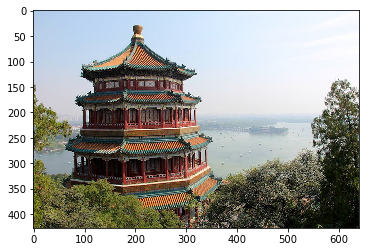

In [154]:
china = load_sample_image('china.jpg')
plt.imshow(china)
print(f'china.shape : {china.shape}')
h, w, c = china.shape
print(f'china.ndim : {china.ndim}')


''' исследуем, что это за картинка '''
compressed_pic = copy(china)
#compressed_pic = np.array_split(compressed_pic, 4)
plt.imshow(compressed_pic)
print(f'тип : {type(compressed_pic)}\nразмеры : {compressed_pic.ndim}, {compressed_pic.shape}, {compressed_pic.size}')
print(f'compressed_pic[0][0] : {compressed_pic[0][0]} - это глубина цвета RGB в 1 пикселе')
print(f'compressed_pic[0][0][0] : {compressed_pic[0][0][0]} - это глубина цвета Red')

